In [1]:
import numpy as np
import pandas as pd
import MetaTrader5 as mt5
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import shared

MetaTrader 5 initialized successfully.


In [2]:
PAIRS = ["WTI", "BRN"]
TIMEFRAME = mt5.TIMEFRAME_H1
BARS = 500
WINDOW_FACTOR = 50

In [3]:
shared.fill_data(PAIRS, TIMEFRAME, BARS)

Fetched data for pair: WTI
Fetched data for pair: BRN


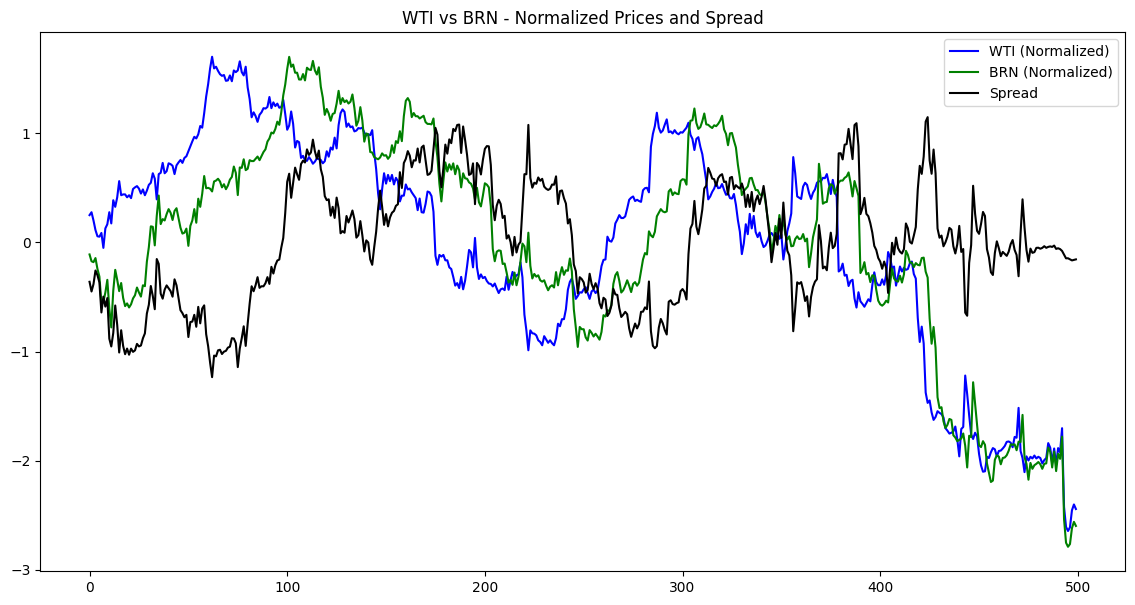

In [4]:
def normalize_prices(df):
    return (df['close'] - df['close'].mean()) / df['close'].std()

# Loop over each unique pair of symbols in the shared.data dictionary
symbols = list(shared.data.keys())
for i in range(len(symbols)):
    for j in range(i + 1, len(symbols)):
        symbol1 = symbols[i]
        symbol2 = symbols[j]
        
        # Normalize prices for both symbols
        df1 = shared.data[symbol1].copy()
        df2 = shared.data[symbol2].copy()
        
        df1['Normalized close'] = normalize_prices(df1)
        df2['Normalized close'] = normalize_prices(df2)
        
        # Calculate the spread between the two normalized series
        spread = df2['Normalized close'] - df1['Normalized close']        
        # Plot the normalized prices and the spread
        plt.figure(figsize=(14, 7))
        plt.plot(df1.index, df1['Normalized close'], label=f'{symbol1} (Normalized)', color='blue')
        plt.plot(df2.index, df2['Normalized close'], label=f'{symbol2} (Normalized)', color='green')
        plt.plot(df1.index, spread, label='Spread', color='black')
        
        plt.title(f'{symbol1} vs {symbol2} - Normalized Prices and Spread')
        plt.legend()
        plt.show()